## Learning Notebook: Feature Importance with Explainable AI (Titanic Dataset)

### Overview

In many real-world projects, we care not just about making accurate predictions but also about understanding **why** the model makes those predictions.
This is especially important when working with high-dimensional data or when explaining results to stakeholders.

### Context
In this notebook, you’ll work with the famous **Titanic dataset**, training a simple **Random Forest classifier**, and then applying **permutation feature importance** to discover which features are most critical for predicting survival.


### Goal
* Train a **Random Forest classifier** to predict survival on the Titanic dataset
* Analyze the Feature importance of the model (mean decrease in impurity)
* Compute **permutation feature importance** using `sklearn.inspection.permutation_importance`
* Visualize the feature importances in a clear bar plot
* Interpret which features are driving the model’s predictions
* Compare the results to built-in feature importance in tree-based models

Follow the cells in this notebook and complete all sections marked as
✅ **Task for Students**.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [26]:
# Load Titanic dataset
dataset = sns.load_dataset('titanic')

In [54]:
#pick features and save them in new df
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = dataset[features + ['survived']].dropna()

In [28]:
dataset[features]

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [6]:
# Encode categorical variables so RDF can process them. e.g.  encode male as 1, female as 0.
# For trees, low-cardinality label order doesn’t matter — they just split on values.
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked']) # 

In [7]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1,0
886,2,1,27.0,0,0,13.0000,2,0
887,1,0,19.0,0,0,30.0000,2,1
889,1,1,26.0,0,0,30.0000,0,1


In [41]:
#check how values from 'sex' and 'embarked' are encoded.
le_sex = LabelEncoder()
df['sex_encoded'] = le_sex.fit_transform(df['sex '])

le_embarked = LabelEncoder()
df['embarked_encoded'] = le_embarked.fit_transform(df['embarked'])
print(le_sex.classes_)
print(df[['sex', 'sex_encoded']].drop_duplicates())

print(le_embarked.classes_)
print(df[['embarked','embarked_encoded']].drop_duplicates())

"""
LEARNING CORNER:
- Label Encoder transform non-numerical to numerical values.
- Usually in alphabet order.
- For sex: female encoded as 0, male encoded as 1.
"""

['female' 'male']
      sex  sex_encoded
0    male            1
1  female            0
['C' 'Q' 'S']
   embarked  embarked_encoded
0         S                 2
1         C                 0
16        Q                 1


In [8]:
# Split the dataset
X = df[features]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✅ **Task for Students** find the built-in impurity-based importance for the model to be able to pass it to the next cell to plot it in a bar plot

In [10]:
# The names of the features can be obtained from the model if X_train is a dataframe
feature_names = X_train.columns

# Random Forest’s built-in impurity-based importance
feature_importances = model.feature_importances_

In [11]:
feature_importances

array([0.12253851, 0.25200353, 0.27273526, 0.04619686, 0.03195607,
       0.25188343, 0.02268634])

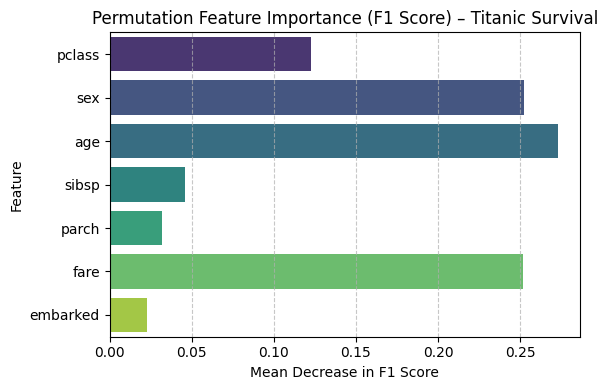

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(y=feature_names,
            x=feature_importances, 
            hue=model.feature_names_in_,  # this is just for nicer visualization
            palette='viridis')# this is just for nicer visualization
plt.title('Permutation Feature Importance (F1 Score) – Titanic Survival')
plt.xlabel('Mean Decrease in F1 Score')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
###LEARNING CORNER:
"""
-These values are impurity-based feature importances from a Random Forest.
-Higher values mean the feature lead RF to make useful splits.
-Feature matter most: sex, age and fare. Together, they made for > 75% of the total importance. ==> model mainly use sex, age and fare to decide the survival.
=> The Random Forest learned that the strongest predictors of Titanic survival were Age, Sex and Fare. Pclass mattered somewhat.
"""

'\n-These values are impurity-based feature importances from a Random Forest.\n-Higher values mean the feature lead RF to make useful splits.\n-Feature matter most: sex, age and fare. Together, they made for > 75% of the total importance. ==> model mainly use sex, age and fare to decide the survival.\n=> The Random Forest learned that the strongest predictors of Titanic survival were Age, Sex and Fare. Pclass mattered somewhat.\n'

✅ **Task for Students** use sklearn permutation_importance to compute the permutation features importance. Use F1 scoring and 10 permutations.

SORT the importances and then pass it to the next cell to plot it in a bar plot. 

In [13]:
# Compute permutation importance
result = permutation_importance(model, X_test, y_test, scoring='f1', n_repeats= 10, random_state=42)

# Create a dataframe including feature names & importances and sort it 
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance':result.importances_mean
}).sort_values(by='Importance',ascending=True)


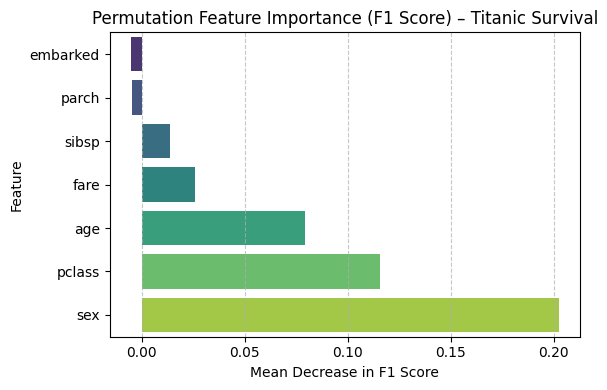

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(data=importance_df, x='Importance', y='Feature',hue='Feature', palette='viridis')
plt.title('Permutation Feature Importance (F1 Score) – Titanic Survival')
plt.xlabel('Mean Decrease in F1 Score')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

✅ **Task for Students** Apply Tree SHAP algorithm from SHAP package to estimate SHAP values , SORT IT and then pass it to the next cell to plot it in a bar plot. 

In [50]:
# SHAP: Explainer + SHAP Values
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

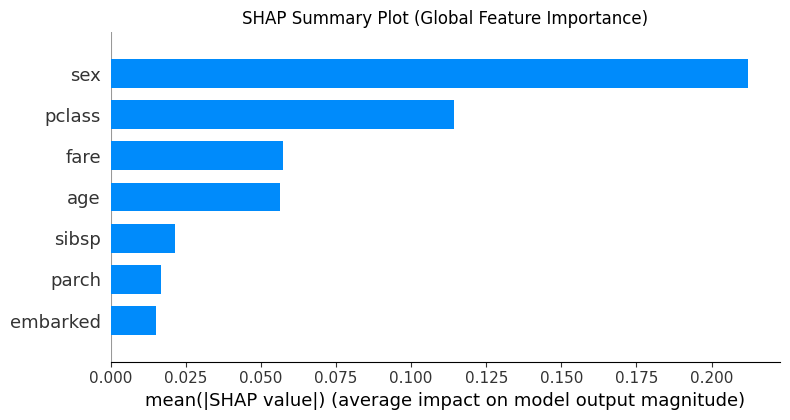

In [51]:
#  Global Summary Plot
plt.title("SHAP Summary Plot (Global Feature Importance)")
shap.summary_plot(shap_values[:,:,1], X_test, plot_type="bar")

✅ **Task for Students**  read through the following documentation to learn how to interpret Beeswarm plots from SHAP. This is must know for the final exam. Once you read this, you need to answer the next task

<br>

The **SHAP Beeswarm Plot** is one of the most powerful tools for understanding how a machine learning model makes decisions — both globally (across the whole dataset) and locally (per feature, per data point).


#### What the SHAP Beeswarm Plot Shows

Each **dot** in the beeswarm plot represents a **single prediction (sample)** from your dataset. The plot answers three key questions **per feature**:


#### 1. **How important is the feature?** (Global Importance)

* Features are ordered **top to bottom** by **mean absolute SHAP value** — i.e., how much that feature contributes, on average, to predictions.
* The higher a feature is, the more it **influences predictions overall**.


#### **In what direction does the feature push predictions?** (Impact)

* **X-axis**: The SHAP value for each prediction:
  * A **positive SHAP value** means the feature pushed the model toward a **higher prediction** (e.g., more likely to survive).
  * A **negative SHAP value** means it pushed toward a **lower prediction** (e.g., more likely not to survive).


#### **How does the feature’s value relate to its effect?** (Value-to-impact mapping)

* **Color**: Each dot is colored by the **feature value** (e.g., red = high value, blue = low value).

  * If red dots are on the right and blue on the left, high values increase the prediction.
  * If blue is on the right, low values increase the prediction.

#### Example Interpretation (Titanic dataset):
For the feature **"sex"**:
* It may be near the top — meaning it’s highly important.
* Blue dots (e.g., "female") might mostly push predictions **right** (positive SHAP values, likely survival).
* Red dots (e.g., "male") might push predictions **left** (less likely survival).

#### Summary

| Aspect         | Meaning                                    |
| -------------- | ------------------------------------------ |
| **Dot**        | A single sample's SHAP value for a feature |
| **X-position** | SHAP value (impact on prediction)          |
| **Y-position** | Feature (ranked by global importance)      |
| **Color**      | Original feature value for that sample     |

It’s one of the best plots to **quickly grasp what your model is doing**, and how it interprets each feature across all predictions.

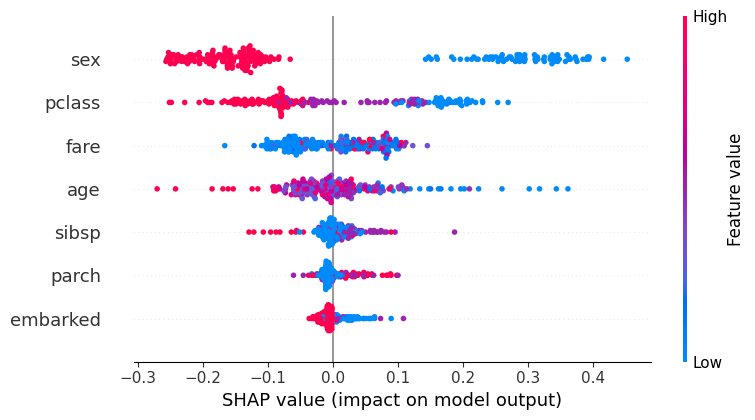

In [52]:
# 📌 6. SHAP Beeswarm Plot
shap.summary_plot(shap_values[:,:,1], X_test)
#(n_samples, n_features, n_classes)
# If we did not specify the plot_type="bar", summary_plot will return the SHAP Beeswarm plot.

In [ ]:
"""
LEARNING CORNER:
- SHAP Beeswarm plot shows thinking as "for each feature, how does increasing or decreasing the feature push the prediction towards survive (1) or not survive (0)" 
- Positive SHAP value: pushes prediction toward class 1.
- Negative SHAP value: pushes prediction toward class 0.
- Each dot = each sample in the X_test dataset.
- Vertical spread in the same row: how many points overlap


SO ....

- For sex: low value 0 - female is in positive -> being female increases survival probability.
- For pclass: low class (1st class) increase chance of survival. Being in the middle or high class (2nd, 3rd) decrease chance of survival.
- For fare: lower fare decrease the chance of survival, whereas high fare increase chances,
- For age: lower age (0- 11 yrs old) increase chance of survive, whereas older people have lower change of survive.

"""

#### ✅ **Task for Students**

Use your observations from the **beeswarm plot** to order each of the following **unordered lists** in **descending order** based on the estimated probability of survival:

Write your answers as **ordered lists**, with the most likely to survive first.

In [49]:
unordered_list_1 = ['50 years old male', '10 years old child']
unordered_lists_2 = [ '25 years old femals', '25 years old male']

# Your solution here
ordered_list_1 = ['10 years old child', '50 years old male']
ordered_lists_2 = ['25 years old femals', '25 years old male']

#### ✅ **Task for Students**
Summarize your observations who was more likely to survive the Titanic sinking?

In [ ]:
Answer = "On the Titanic, the evacuation follows the rule 'woman' and 'children' first. These people have high survival rates, especially those in lower passenger classes"

<br>

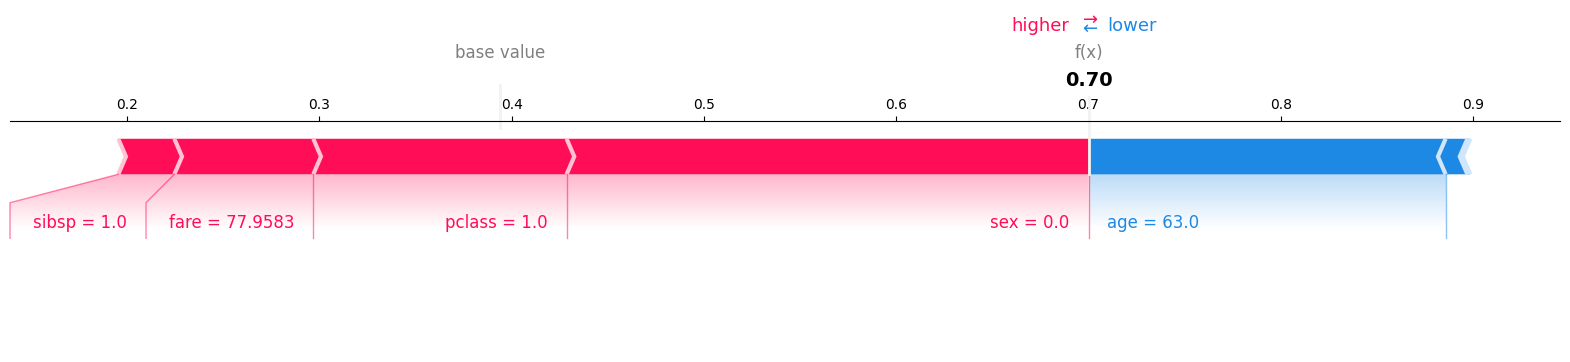

In [53]:
# BonusForce Plot (Local Explanation for One Sample)
i = 100  # index of test instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[:,:,1][i], X_test.iloc[i], matplotlib=True)